## Data Analysis Project for Rover


# Exploratory data analysis (EDA): Haberman’s Cancer Survival Dataset

## What is Exploratory Data Analysis?

 EDA is a statistical approach of anayse data sets to summarize their main characteristics with the help of graphical 
 representations and statistics.It is a good practice to understand the data first and try to gather as many insights from it.
 EDA is all about making sense of data in hand,before getting them dirty with it.


## Why EDA?

In a hurry to get to the machine learning stage, some data scientists either entirely skip the exploratory process or do a very perfunctory job. This is a mistake with many implications, including generating inaccurate models, generating accurate models but on the wrong data, not creating the right types of variables in data preparation, and using resources inefficiently because of realizing only after generating models that perhaps the data is skewed, or has outliers, or has too many missing values, or finding that some values are inconsistent.


In this blog, we take Haberman’s Cancer Survival Dataset and perform various EDA techniques using python. You can easily download the dataset from Kaggle.

# EDA on Haberman’s Cancer Survival Dataset.

## 1. UNDERSTANDING THE DATASETS

 To understand EDA i am using a HABERMAN data sets. Haberman’s data set contains data from the study conducted in University of
 Chicago’s Billings Hospital between year 1958 to 1970 for the patients who undergone surgery of breast cancer.

 There are 4 attribute in this data set out of which 3 are features and 1 class attribute as below. 
 Also, there are 306 instances of data.

 1.Number of Axillary nodes(Lymph Nodes)
 
 2.Age
 
 3.Operation Year
 
 4.Survival Status
 
   1 = the patient survived 5 years or longer
   2 = the patient died within 5 years

### Survival Status:  
It represent whether patient survive more than 5 years or less after undergone through surgery.
 Here if patients survived 5 years or more is represented as 1 and patients who survived less than 5 years is represented as 2.

### Lymph Node: 
Lymph nodes are small, bean-shaped organs that act as filters along the lymph fluid channels. 
As lymph fluid leaves the breast and eventually goes back into the bloodstream, the lymph nodes try to catch and trap cancer 
 cells before they reach other parts of the body. Having cancer cells in the lymph nodes under your arm suggests 
 an increased risk of the cancer spreading.In our data it is axillary nodes detected(0–52)

 ### Age: 
It represent the age of patient at which they undergone surgery (age from 30 to 83)
    
### Operation year: 
Year in which patient was undergone surgery(1958–1969)  


## 2. Importing Libraries And Loading The File:

To starts with,importing necessary libraries (for this example pandas, numpy,matplotlib and seaborn) and loaded the data set.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
heberman=pd.read_csv('haberman.csv')
heberman

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


## 3. UNDERSTANDING THE DATA

To take a closer look at the data “.head()” function of pandas library which returns first five observations of the data set.
 
Similarly ".tail()” returns last five observations of the data set.



In [8]:
heberman.head()
heberman.tail()

,age,year,nodes,status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [21]:
# It will show the number of rows and columns in the data set.

heberman.shape

(306, 4)

It is also a good practice to know the columns and their corresponding data types,along with finding 
whether they contain null values or not



In [9]:
# .info function will give the complete imformation of data set.

heberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [7]:
# The describe() function in pandas is very good function that will describe many statical values like mean, median etc.

heberman.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### Observations:

1.Count : Total number of values present in respective columns.

2.Mean: Mean of all the values present in the respective columns.

3.Std: Standard Deviation of the values present in the respective columns.

4.Min: The minimum value in the column.

5.25%: Gives the 25th percentile value.

6.50%: Gives the 50th percentile value.

7.75%: Gives the 75th percentile value.

8.Max: The maximum value in the column.

In [9]:
# It will print the number of column present in the data set.

print(heberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [46]:
# Mapping the status 1 with yes and 2 with no.

heberman['status']=heberman['status'].map({1:'yes',2:'No'})
heberman.head()

,age,year,nodes,status
0,30,64,1,yes
1,30,62,3,yes
2,30,65,0,yes
3,31,59,2,yes
4,31,65,4,yes


In [47]:
heberman["status"].value_counts()

yes    225
No      81
Name: status, dtype: int64

### Observations:

1.The value_counts() function tells how many data points for each class are present. Here, it tells how many patients survived and how many did not survive.

2.Out of 306 patients, 225 patients survived and 81 did not.

3.The dataset is imbalanced

In [65]:
status_yes=heberman[heberman['status']=='yes']
status_yes.describe()

,age,year,nodes
count,225.000000,225.000000,225.000000
mean,52.017778,62.862222,2.791111
std,11.012154,3.222915,5.870318
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [68]:
status_no=heberman[heberman['status']=='No']
status_no.describe()

,age,year,nodes
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


### Observations:

1.The mean age and the year in which the patients got operated are almost similar of both the classes, while the mean of the nodes of both the classes differs by 5 units approximately.

2.The nodes of patients who survived are less when compared to patients who did not survive.

# 4. BI-VARIENT ANALYSIS:

## 4.1 Scatter Plots

A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis.

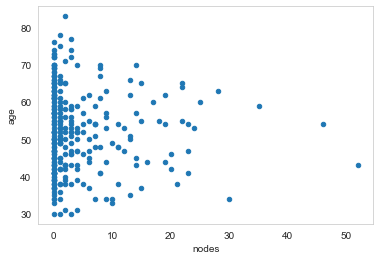

In [18]:
heberman.plot(kind='scatter',x='nodes',y='age')
plt.grid()
plt.show()

### Observations:

1.Above plot is a scatter plot w.r.t the Nodes on x-axis and Age on y-axis.plt.grid() and plt.show() are matplot library that 
 plot the data in grid.

2.Above plot shows the data in a overlap function with same color due to which we cannot analyse the data in a efficient manner   and we may lead to wrong conclusion.

3.To distinguish the data with different color we can use SEABORN function library.

##### SCATTER PLOT USING SEABORN:

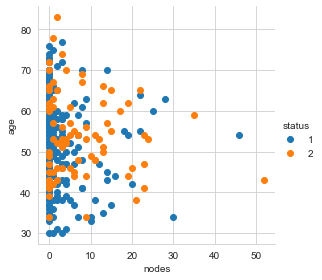

In [36]:
sns.set_style("whitegrid")
sns.FacetGrid(heberman,hue="status",size=4)\
   .map(plt.scatter,"nodes","age")\
   .add_legend();
plt.show();



# Observations:

Above data set- Blue color dot represent the survival more than 5 years and orange dot represent the survival less 
than 5 yers.Most points are overlap with each other.For further analysis we will see different plot.


## 4.3. PAIR PLOT:

By default, this function will create a grid of Axes such that each variable in data will be shared in the y-axis across single row and in the x-axis across a single column.The diagonal Axes are treated differently,drawing a plot to show the univariate distribution of the data for the variable in that column.

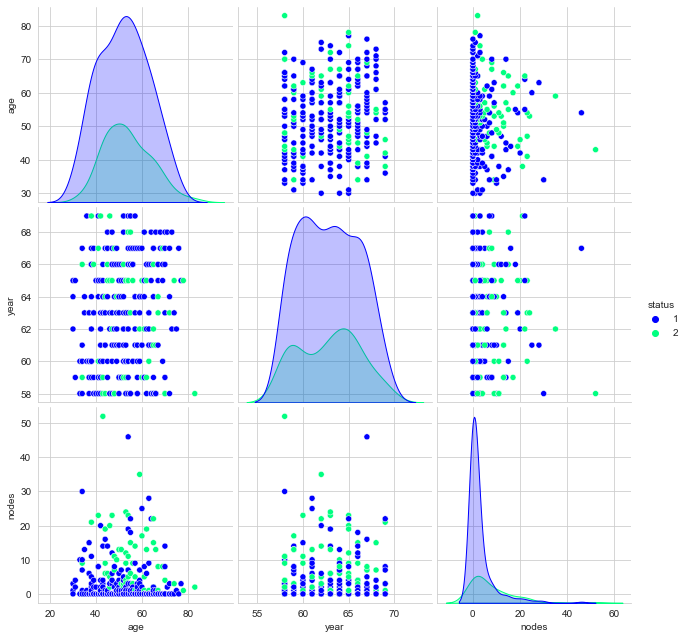

In [11]:
plt.close();
sns.set_style("whitegrid")
sns.pairplot(heberman, hue="status",size=3,palette="winter");
plt.show()

### Observations:
 
1.Plot 1,5,9 are PDF which we will see later.

2.Plot-2= In this particular plot most of the points are overlappeing with each other,It is a bit confusing so will not take
          this plot for further observaton.

3.Plot-3= In Plot 3 some points are distinguishable. It is better than other plot. In this plot the overlap of points are 
          there but still it is better than all other plots comparatively. So will select the data feature of this plot ie. Age           and nodes.

4.Plot-4,Plot 6= Both plots are almost similar to plot2 if we move this plot to 90 degree. So will not select this plot.


5.So will consider Plot 3 and Plot 7 for my all further data operations.

## 5. UNIVARIANT ANALYSIS:

The major purpose of the univariate analysis is to describe, summarize and find patterns in the single feature.

Lets plot 1D scatter plot and see if I can distinguish data.

In [ ]:
import numpy as np
heberman_Long_Survive = heberman.loc[heberman["status"] == 1];
heberman_Short_Survive = heberman.loc[heberman["status"] == 2];
plt.plot(heberman_Long_Survive["nodes"], np.zeros_like(heberman_Long_Survive['nodes']), 'o')
plt.plot(heberman_Short_Survive["nodes"], np.zeros_like(heberman_Short_Survive['nodes']), 'o')
plt.show()

### Observations:
    
1.Above plot is a 1-D scatter plot.But its very difficult to visualize the point. Most points are overlappling.

2.Disadvantages of 1-D scatter plot: Very hard to make sense as points are overlapping a lot.
    
3.We will get the better observation if we will use the PDF and CDF of each data.

## 5.1 Probability Density Function(PDF):
    
Probability Density Function (PDF) is the probability that the variable takes a value x. (a smoothed version of the histogram).

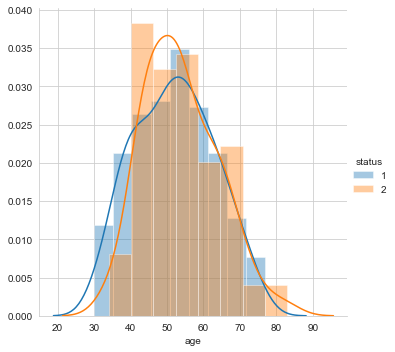

In [15]:
# PDF of AGE:

sns.FacetGrid(heberman,hue="status",size=5)\
   .map(sns.distplot,"age")\
   .add_legend();
plt.show();

### Observations:

1.Major overlapping is observed, which tells us that survival chances are irrespective of a person’s age

2.From plot it is observed that at the age range from 30–75 the status of survival and death are same. 

3.Yet, this cannot be our final conclusion. We cannot decide the survival chances of a patient just by considering 
  the age parameter

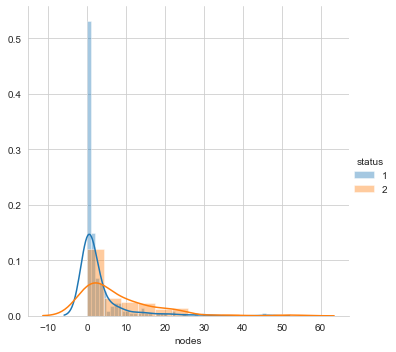

In [16]:
# PDF of NODES:

sns.FacetGrid(heberman,hue="status",size=5)\
   .map(sns.distplot,"nodes")\
   .add_legend();
plt.show()


### Observations:

1.From the above plot it has been observed that people survive long if they have less nodes.There are less chance to survive if 
node size more than 25

2.if(nodes<=o):
    
Patient=long survived

elif(nodes>=0 && nodes<=25)

Patient= Long survival chances are high

elif(node size ≥25)

Patient = Short survival
    



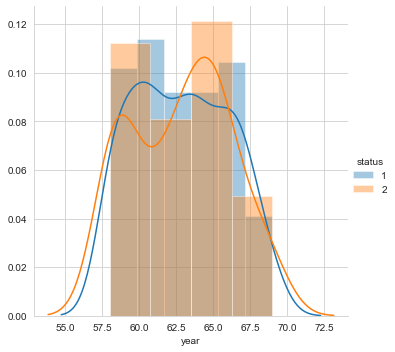

In [17]:
# PDF of YEAR:

sns.FacetGrid(heberman,hue="status",size=5)\
   .map(sns.distplot,"year")\
   .add_legend();
plt.show()

### Observations:
    
1.Above plot is bit confusing so we could not make any conclusion out of it.

2.From above PDF we can say the patients survival status, but we cannot exactly say what percentage of 
   patient will actually short survive or long survive. To know that we have another distribution that is CDF.

## 5.2 Cumulative Distribution Function(CDF):

The Cumulative Distribution Function (CDF) is the probability that the variable takes a value less than or equal to x.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
***********************************************************
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


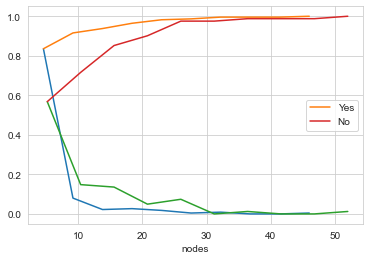

In [69]:
# CDF of NODES:

counts1, bin_edges1 = np.histogram(status_yes['nodes'], bins=10, density = True)
pdf1 = counts1/(sum(counts1))
print(pdf1);
print(bin_edges1)
cdf1 = np.cumsum(pdf1)
plt.plot(bin_edges1[1:], pdf1)
plt.plot(bin_edges1[1:], cdf1, label = 'Yes')
plt.xlabel('nodes')

print("***********************************************************")

counts2, bin_edges2 = np.histogram(status_no['nodes'], bins=10, density = True)
pdf2 = counts2/(sum(counts2))
print(pdf2);
print(bin_edges2)
cdf2 = np.cumsum(pdf2)
plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2, label = 'No')
plt.xlabel('nodes')
plt.legend()
plt.show()




### Observations:

1.The CDF  of Long survival status is shown on plot in orange colour.

2.From this plot we can conclude that there is 85% chance of ling survival if nodes size is less than 5.

3.CDF of Short survival status is shown in Red color.

In [71]:
# Means of the status value 2 or NO

print("means:")
print(np.mean(heberman["status"]=='No'))

means:
0.2647058823529412


In [72]:
# Means of the status value 1 or yes

print("means:")
print(np.mean(heberman["status"]=='yes'))

means:
0.7352941176470589


In [70]:
# Standard Deviation status value 2 or No.

print("std_dve:")
print(np.std(heberman["status"]=='No'))

std_dve:
0.4411764705882353


In [73]:
# Standard Deviation status value 1 or ye.

print("std_dve:")
print(np.std(heberman["status"]=='yes'))

std_dve:
0.4411764705882353


## 5.4 BOX PLOT AND VIOLIN PLOT:

1.BOX PLOT is a easy plotting method to determine 25 75 50 percentile value.

2.The box extends from the lower to upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data. Outlier points are those past the end of the whiskers.


3.Violin plot is the combination of box plot and CDF.

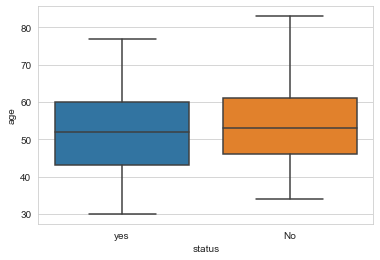

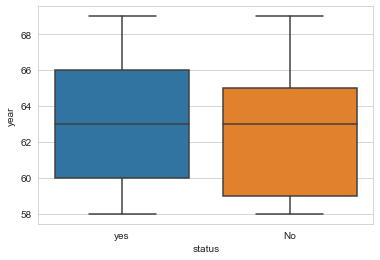

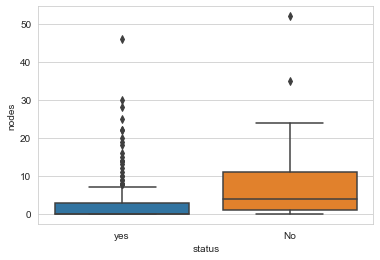

In [76]:
sns.boxplot(x='status',y='age',data=heberman)
plt.show()

sns.boxplot(x='status',y='year',data=heberman)
plt.show()

sns.boxplot(x='status',y='nodes',data=heberman)
plt.show()

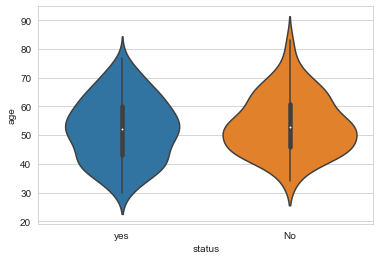

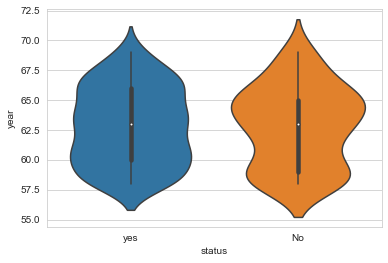

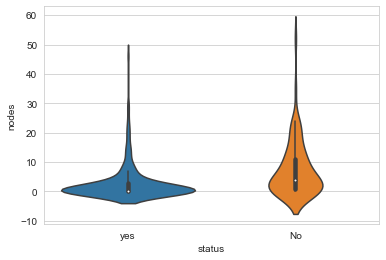

In [77]:
sns.violinplot(x='status',y='age',data=heberman,size=8)
plt.show()

sns.violinplot(x='status',y='year',data=heberman,size=8)
plt.show()

sns.violinplot(x='status',y='nodes',data=heberman,size=8)
plt.show()

### Observations:

1.Patients with more than 1 nodes are not likely to survive. More the number of nodes, lesser the survival chances.

2.A large percentage of patients who survived had 0 nodes.

3.Patients who did not survive lies between the age of 35 and 60.

4.There were comparatively more people who got operated in the year 1965 did not survive for more than 5 years.

5.The box plots and violin plots for age and year parameters give similar results with a substantial overlap of data points.     The overlap in the box plot and the violin plot of nodes is less compared to other features but the overlap still exists and   thus it is difficult to set a threshold to classify both classes of patients.

## 6. MULTIVARIATE ANALYSIS:

### 6.1 Contour Plot:

A contour line or isoline of a function of two variables is a curve along which the function has a constant value.
It is a cross-section of the three-dimensional graph.

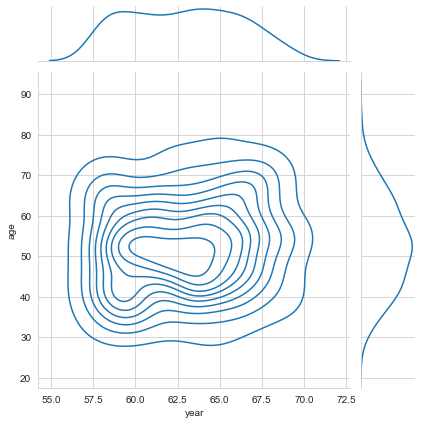

In [78]:
sns.jointplot(x = 'year', y = 'age', data = heberman, kind = "kde")
plt.show()

### Observations:

1.It is a 3-D visualization.

2.Between 1960 and 1965 more number of operations done for the patient age lies between 45 and 60.

## 7. CONCLUSIONS:

1.Yes, we can diagnose the Cancer using Haberman’s Data set by applying various data analysis techniques and using various    Python libraries.

2.We can conclude that patient survival rate is high if they have small nodes or no nodes.

3.Most operations are done between 1960 and 1965.

4.People who died lies between range of 45 and 60.